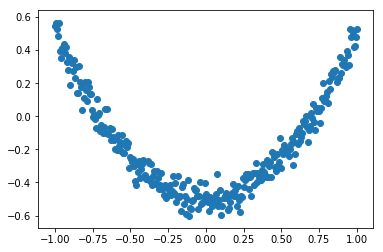

0.92172986
0.021738458
0.011933529
0.008337647
0.0071335635
0.0062754904
0.005694373
0.005337545
0.0051288637
0.004982623
0.0048651304
0.0047715902
0.0046963487
0.0046414854
0.0046030055
0.00457702
0.00455638
0.004538196
0.0045223883
0.0045059593


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs,in_size,out_size,activation_function=None):
#     layer_name = 'layer%s' % n_layer##命令改变，不执行  
    with tf.name_scope('layer'):
        with tf.name_scope('weight'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size]),name = 'W')
            ##tf.histogram_summary(layer_name + '/weights',Weights)  ##命令改变，不执行        
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
#             tf.histogram_summary(layer_name + '/biases',biases)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs,Weights) + biases
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
#             tf.histogram_summary(layer_name + '/outputs',outputs)
        return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5 + noise

with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1],name = 'x_input')
    ys = tf.placeholder(tf.float32,[None,1],name = 'y_input')

l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
#     tf.summary.scalar('loss',loss)##命令改变，不执行  
with tf.name_scope('train_step'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
# merged = tf.merge_all_summaries()

##windows可视化用tensorboard --logdir logs/这个命令
tf.summary.FileWriter("logs/",sess.graph)

sess.run(init)

fig = plt .figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print (sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.1)

#         result = sess.run(merged,feed_dict={xs:x_data,ys:y_data})####命令改变，不执行  
#         writer.add_summary(result,i)##命令改变，不执行  